**Catatan Kuliah AK3251**  
Leonardo Valentino Kosasih (10818015)  
M. Agam Islami Al Mutaqin (10818033)  

%%latex  
\tableofcontents
\newpage

# Packages yang Akan Digunakan

In [1]:
import numpy as np              # Vektor dan Matriks 
import pandas as pd             # DataFrame
import matplotlib.pyplot as plt # Visualisasi Grafik
import seaborn as sns           # Visualisasi Grafik
from scipy.special import comb  # Fungsi khusus untuk menghitung Kombinasi
import seaborn as sns           # KDE plotting
plt.style.use('ggplot')         # Style untuk Grafik

# **Brownian Motion**

## Gerak Partikel

Sebelum memahami proses Brownian Motion, akan dijelaskan dulu mengenai gerak suatu partikel. Misal terdapat partikel yang hanya dapat bergerak sejauh $\Delta x$ dari titik asalnya (ke kiri atau ke kanan) pada selang waktu $\Delta t$. 

![graphit.png](graphit.png)
  
Dengan menetapkan posisi awal partikel tersebut pada titik 0, akan ditinjau perubahan posisi dari partikel tersebut pada 4 kali perubahan waktu $(4\Delta t)$. Maka kombinasi pergerakan partikel dapat diuraikan sebagai berikut :
(Asumsi $\Delta x=1$)  

In [2]:
"Membangun sebuah Fungsi untuk Mensimulasikan Gerak Partikel"
def Particle(n,dx=1):
    x = [0 for i in range(n+1)]   # Vektor/Array yang digunakan untuk menyimpan Posisi Partikel
    for i in range(n):
        U = np.random.random() 
        x[i+1] = x[i] + (U<0.5)*2*dx - dx
    return x

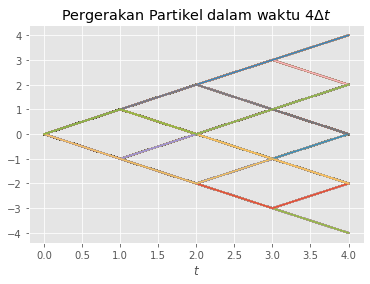

In [3]:
"Simulasi Gerak Partikel Hingga t=4"

N = 1000   # Banyak Simulasi
n = 4      # Banyak t
X = []     # Array kosong

"Proses Iterasi"
for i in range(N):
    X.append(Particle(n))
for i in range(N):
    plt.plot([j for j in range(n+1)],X[i])

plt.title("Pergerakan Partikel dalam waktu $4\Delta t$")
plt.xlabel('$t$')
plt.show()

Perhatikan bahwa posisi akhir partikel berada pada $-4Δt,-2Δt,0,2Δt,$atau $4Δt.$


---


**Bukti :**

Akan dibuktikan bahwa jika suatu waktu kelipatan genap, maka posisi akhir partikel hanya terdapat pada posisi bernilai genap.

Misal $r$ jumlah langkah ke kanan dan $l$ jumlah langkah ke kiri, akibatnya posisi akhir $m=r-l$.

karena waktu akhir kelipatan genap, maka $r+l$ haruslah genap.

akibatnya, $r$ dan $l$ harus keduanya genap dan keduanya ganjil, dan dua kondisi tersebut menghasilkan nilai $r-l$ yang genap.

Sehingga terbukti bahwa jika suatu waktu kelipatan genap, maka posisi akhir partikel hanya terdapat pada posisi bernilai genap.

---

Salah satu aplikasi penerapan dari gerak partikel ini adalah simulasi harga saham. Harga saham yang naik turun dianalogikan dengan pergerakan kanan kiri dari partikel.

![simulasi.png](simulasi.png)  
  
Perhatikan bahwa pada diagram tersebut harga saham, $S$, dapat naik menjadi $uS$ dengan peluang $p$ dan dapat turun menjadi $dS$ dengan peluang $1-p$.  
  
Dengan asumsi ini, harga saham dapat dipandang sebagai gerak Brown (Brownian Motion). Dengan menetapkan posisi awal pada titik 0 dengan besar perubahan sebesar $\Delta x$ pada perubahan waktu sebesar $\Delta t$. Untuk selanjutnya akan dianalogikan $u$ sebagai pergerakan ke kanan dan $l$ pergerakan kiri.

Dengan mendefinisikan :

$r$   : banyak langkah ke kanan

$l$   : banyak langkah ke kiri

$mΔx$ : posisi partikel pada waktu ke $t$

$n$ : banyak langkah total

Perhatikan bahwa, (Asumsi $Δx = 1$)

$$mΔx = m = r - l$$
$$n = r + l$$

Akibatnya,

$$r = \frac{1}{2}(n+m)$$
$$l = \frac{1}{2}(n-m)$$

Sehingga untuk posisi $m$ pada waktu $t$ dalam $n$ langkah, jumlah langkah ke kanan selalu bernilai $\frac{1}{2}(n+m)$ (dengan $n+m$ bilangan genap).

Maka jumlah kemungkinan langkah dari 0 hingga menempati posisi $m$ pada waktu $t$ adalah jumlah kombinasi antara $r$ dan $l$ pada langkah yanng dilakukan.

Sehingga dapat dirumuskan,

$$C(n,r) = \frac{n!}{r!(n-r)!}$$

Lalu, ingat bahwa jumlah semua kemungkinan pada tiap posisi hingga waktu $t$ adalah $2^n$ (aturan perkalian).

Sehingga, peluang partikel tersebut berada pada posisi $x = mΔx$ pada waktu $t$ dapat dirumuskan sebagai berikut :

$$p(x,t) = \frac{C(n,r)}{2^n}$$



In [4]:
"Simulasi Gerak Brown Hingga t=80"

N = 100000  # Banyak Simulasi
n = 80      # Banyak t
X = []      # Array Kosong

"Proses Iterasi"
for i in range(N):
    X.append(Particle(n)[-1])

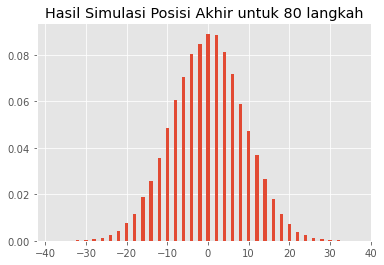

In [5]:
freq = pd.Series(X).value_counts().sort_index()           # Menghitung frekuensi tiap nilai setelah 80 langkah
data = pd.DataFrame(freq,columns=['data']).reset_index()  # Membuat Dataframe dari nilai sebelumnya

"Visualisasi Grafik"
plt.bar(data['index'],data['data']/N)
plt.title("Hasil Simulasi Posisi Akhir untuk 80 langkah")
plt.show()

In [6]:
"Fungsi untuk memperoleh nilai dari distribusi dari kombinasi banyaknya Simulasi dengan hasil simulasi"
def p(x,n):
    if (x+n)%2 == 0:
        r = int(0.5*(n+x))
        return comb(n,r)/(2**n)
    else:
        return 0

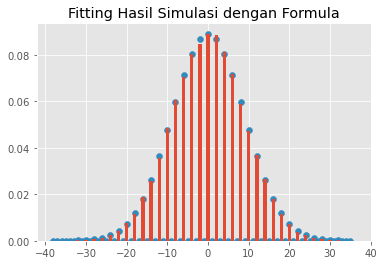

In [7]:
"Simulasi"
P = []    # Array Kosong

"Iterasi"
for i in range(min(data['index']),max(data['index'])):
    P.append(p(i,n))

"Visualisasi Grafik"
plt.bar(data['index'],data['data']/N)
plt.scatter([i for i in range(min(data['index']),max(data['index']))],P)
plt.title("Fitting Hasil Simulasi dengan Formula")
plt.show()

Untuk suatu langkah ke-i, maka hanya terdapat 2 kemungkinan yaitu posisi $Δx$ dan $-Δx$ dari posisi sebelumnya dengan peluang masing-masing $\frac{1}{2}$. Akibatnya,

$$E[X_i] = (Δx)(\frac{1}{2}) + (-Δx)(\frac{1}{2}) = 0$$
$$Var(X_i) = (Δx)^2 (\frac{1}{2}) + (-Δx)^2 (\frac{1}{2}) = (Δx)^2$$

Akibatnya, untuk $n\in \mathbb{N}$ diperoleh :

$$E[X] = E[\sum_{i=1}^n {X_i}]= nE[X_i] = 0$$
$$Var(X) = Var(\sum_{i=1}^n {X_i}) = nVar(X_i) = n(Δx)^2$$

In [8]:
#@title
print("E[X] Hasil Formula    : ",0)
print("E[X] Hasil Simulasi   : ",np.mean(X))
print("Var(X) Hasil Formula  : ",n*1**2)
print("Var(X) Hasil Simulasi : ",np.var(X))

E[X] Hasil Formula    :  0
E[X] Hasil Simulasi   :  -0.00908
Var(X) Hasil Formula  :  80
Var(X) Hasil Simulasi :  79.8643975536


Hal tersebut dapat berlaku karna pada percobaan $n=1$, percobaan tersebut adalah percobaan Bernoulli. Karena percobaan $n$ dapat dipandang sebagai percobaan Bernoulli yang saling bebas satu sama lain maka dapat berlaku seperti persamaan di atas.   

Berikutnya akan dilihat bagaimana bila $n→∞$.
Perlu diketahui bahwa untuk n yang cukup besar, nilai $C(n,r)$ dapat diaproksimasi dengan persamaan Stirling 

$$C(n,r) \approx 2^n \sqrt{\frac{2}{\pi n}} e^{-\frac{(2r-n)^2}{2n}}$$

Akibatnya,
\begin{align*}
p(x,t) &\approx \frac{1}{\sqrt{2\pi n \Delta x^2}} e^{-\frac{x^2}{2n\Delta x^2}},\;\; ingat\;bahwa\; t=n\Delta t \Rightarrow n = \frac{t}{\Delta t}\\
&= \frac{1}{\sqrt{2\pi \frac{t}{\Delta t} \Delta x^2}} e^{-\frac{x^2}{2\frac{t}{\Delta t}\Delta x^2}}
\end{align*}

Misal $D=\frac{\Delta x^2}{2\Delta t}$,

Saat $n\to \infty$, maka $\Delta x,\Delta t \to 0$. Agar D memiliki nilai hingga, maka diharapkan $\Delta t$ sebanding dengan $\Delta x^2$.

Akibatnya,
$$p(x,t)\approx \frac{1}{\sqrt{4\pi tD}} e^{-\frac{x^2}{4tD}}$$

yang merupakan probability density function dari distribusi normal dengan $\mu = 0$ dan $\sigma^2 = 2tD$

# **Proses Wiener**


Suatu proses $W_t$ dikatakan Proses Wiener apabila :

$W_0 = 0$
1.   $W_{t+h} - W_t \sim N(0,\sigma^2h)$
2.   $[t_1,t_2]$ dan $[t_3,t_4]$ saling bebas, maka $W_{t_4}-W_{t_3}$ dan $W_{t_2}-W_{t_1}$ pun saling bebas.

Jika $\sigma=1$, maka Proses Wiener tersebut merupakan Standard Brownian Motion.

$$W_{t+h}-W_t=\Delta W_t$$ 
$$\implies E[W_{t+h}] - E[W_t] = E[\Delta W_t]$$
$$\implies [W_{t+h}] = W_t E[\Delta W_t] , \text{dengan} \; E[\Delta W_t]= 0 \;\; \text{(sifat Martingale)}$$




In [9]:
def Wiener(sigma,t,n):
    W = [0]    # Inisiaslisasi Nilai awal Proses Wiener
    dW = []    # Array yang menyimpan selisih Nilai
    dt = t/n   # Banyaknya Iterasi 
  
    "Iterasi"
    for i in range(n):
        dW.append(sigma*np.sqrt(dt)*np.random.randn())
    for i in range(n):
        W.append(W[i]+dW[i])
    return W

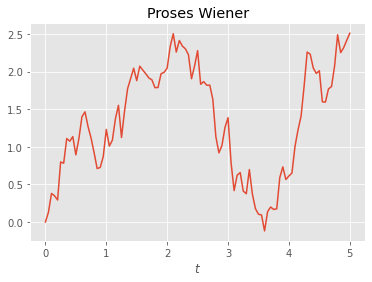

In [10]:
"Simulasi Proses Wiener"
sigma = 1    # Besar Variansi
n = 100      # Banyaknya Iterasi
t = 5        # Waktu akhir

"Visualisasi"
plt.plot(np.linspace(0,t,n+1),Wiener(sigma,t,n))
plt.xlabel('$t$')
plt.title("Proses Wiener")
plt.show()

# **Arithmetic Random Walk**

Formulasi dari Arithmetic Random Walk adalah :
\begin{align*}
x_t = x_{t-1} + \varepsilon_t \quad \forall t = 1,2,\cdots 
\end{align*}
Arti dari formulasi tersebut adalah nilai $x_t$ hanya bergantung pada nilai pada $t-1$ dan galatnya. Diketahui juga bahwa galat dari Random Walk tersebut berdistribusi Normal baku sehingga persamaan tersebut dapat ditulis ulang menjadi 
\begin{align*}
x_t = x_{t-1} + \sigma \sqrt{\Delta t}Z_t \quad \forall t = 1,2,\cdots 
\end{align*}
Dengan $Z$ merupakan bilangan random yang berdistribusi normal baku, dan $\sigma$ standar deviasi.  
  
Hanya saja terdapat kekurangan dari permodelan tersebut jika digunakan untuk memodelkan harga saham. Dari persamaan diatas, $Z_t$ bisa saja bernilai negatif dan $\sigma \sqrt{\Delta t}Z_t > x_{t-1}$ yang mengakibatkan nilai dair $x_t<0$ yang tidak berlaku pada realita.

# **Geometric Random Walk**  


Untuk mengatasi permasalahan mengenai perubahan menuju nilai negatif, akan dirumuskan persamaan dibawah ini.

Berangkat dari ide bahwa perubahan harga saham $\Delta S$ :

\begin{align*}
\Delta S_t &= S_t (X_t - X_{t-\Delta t})\\
& = S_t (X_t - X_{t-\Delta t})\\
\frac{\Delta S_t}{S_t}& = \mu t + W_t - \mu (t-\Delta t) - W_{t-\Delta t}\\
& = \mu (t - (t-\Delta t)) + (W_t - W_{t-\Delta t})\\ 
& = \mu \Delta t + \Delta W_t
\end{align*}

Akibatnya, untuk suatu partisi t yang sangat kecil, diperoleh 

\begin{align*}
\frac{d S_t}{S_t}& = \mu \;dt + dW_t
\end{align*}

Formulasi dari Geometric Random Walk adalah :
\begin{align*}
\frac{\Delta x_t}{x_t} = \mu_t+dW_t \quad \forall t = 1,2,\cdots 
\end{align*}
Dengan $W_t$ adalah Proses Wiener. Sehingga persamaan di atas dapat ditulis ulang menjadi 
\begin{align*}
\frac{\Delta x_t}{x_t} = \mu\, dt+\sigma\sqrt{dt}Z_t \quad \forall t = 1,2,\cdots 
\end{align*}
Dengan $Z$ merupakan bilangan random yang berdistribusi normal baku, dan $\sigma$ standar deviasi. Misalkan $c_i$ adalah perbandingan antara $\frac{\Delta S_i}{S_i}=\frac{S_{i+1}-S_i}{S_i}$. Maka dapat diperoleh rataan $c_i$ adalah $h\Delta t$ dan variansinya $\sigma^2 \Delta t$ sehingga rataan dari $c_i$ dapat ditaksir menjadi 
$$\mu \approx \frac{1}{n\Delta t}\sum_{i=0}^{n-1}c_i$$
Dan untuk variansinya adalah :
$$\sigma^2 = \frac{1}{(n-1)\Delta t}\sum_{i=0}^{n-1}(c_i-\mu\Delta t)^2$$

In [11]:
def geom_rw(S0 = 100, T = 1, mu =0, sigma = 1, dt = 1/365):
  s = [S0]
  for i in range(1,int(T/dt)):
    ds = s[-1]*(mu*dt + sigma*np.sqrt(dt)*np.random.randn())
    s.append(s[-1]+ds)
  return s

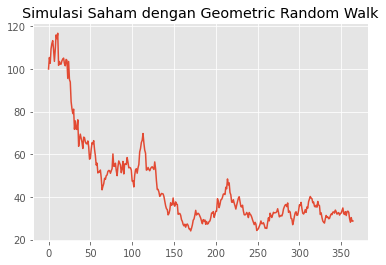

In [12]:
"Simulasi Harga Saham dengan Geometric Random Walk"
T  = 1
dt = 1/365

"Visualisasi"
plt.plot([i for i in range(int(T/dt))],geom_rw())
plt.title("Simulasi Saham dengan Geometric Random Walk")
plt.show()

Perhatikan bahwa harga saham tidak pernah bernilai negatif

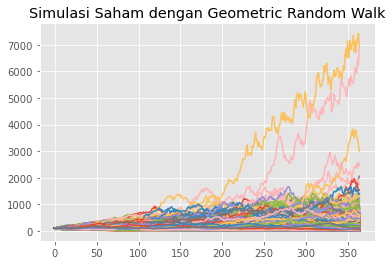

In [13]:
def dist_geom_rw(simul = 10000, S0 = 100, T = 1, mu =0, sigma = 1, dt = 1/365):
  s = np.zeros((simul,int(T/(dt))))
  for i in range(simul):
    s[i,0] = S0
    for j in range(1,365):
      ds = s[i,j-1]*(mu*dt + sigma*np.sqrt(dt)*np.random.randn())
      s[i,j]=s[i,j-1]+ds
  return s
T  = 1
dt = 1/365
plt.plot([i for i in range(int(T/dt))],dist_geom_rw().T)
plt.title("Simulasi Saham dengan Geometric Random Walk")
plt.show()

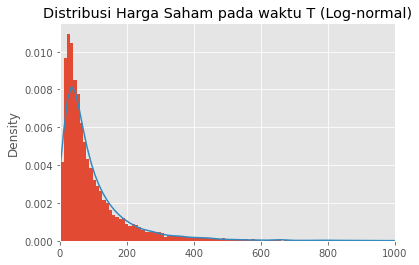

In [14]:
plt.hist(dist_geom_rw().T[-1], bins=300, density=True)
plt.axis(xmin=0,xmax=1000)
plt.title("Distribusi Harga Saham pada waktu T (Log-normal)")
sns.kdeplot(dist_geom_rw().T[-1])
plt.show()

Perhatikan bahwa 
$$S_1 = S_0 (1+\mu\Delta t+\sigma \sqrt{\Delta t} Z_1)$$
$$S_2 = S_1 (1+\mu\Delta t+\sigma \sqrt{\Delta t} Z_2)$$
$$\vdots$$
$$S_n = S_{n-1} (1+\mu\Delta t+\sigma \sqrt{\Delta t} Z_n)$$

Sehingga dapat ditulis menjadi :
$$S_n = S_o\prod_{i=1}^n(1+\mu\Delta t+\sigma \sqrt{\Delta t} Z_i)$$
Jika diubah dalam bentuk $\log$ menjadi 
$$\log{\left(\frac{S_n}{S_0}\right)} = \sum_{i=1}^n\log{(1+\mu\Delta t+\sigma \sqrt{\Delta t} Z_i)}$$

Ingat kembali bahwa 
$$\log(1+x) = x - \frac{x^2}{2}+\frac{x^3}{3}-\frac{x^4}{4} + \dots$$
Sehingga jika dimisalkan $x=\frac{S_n}{S_0}$ maka dapat diperoleh 


$$\log{\left(\frac{S_n}{S_0}\right)} = \sum_{i=1}^n{(\mu\Delta t+\sigma \sqrt{\Delta t} Z_i)} - \frac{1}{2}{(\mu\Delta t+\sigma \sqrt{\Delta t} Z_i)}^2+\dots$$


Dengan menetapkan nilai aproksimasi dari log hanya hingga suku kedua, maka

$$\log{\left(\frac{S_n}{S_0}\right)} = \sum_{i=1}^n{(\mu\Delta t+\sigma \sqrt{\Delta t} Z_i)} - \frac{1}{2}{(\mu\Delta t+\sigma \sqrt{\Delta t} Z_i)}^2$$

Dan jika ditinjau per suku maka :
$$\sum_{i=1}^n\mu \Delta t = \sum_{i=1}^n\mu \frac{T}{n}=\mu T$$
$$\sum_{i=1}^n \sigma \sqrt{\Delta t}Z_i = \sigma \sqrt{\frac{T}{n}}\sum_{i=1}^nZ_i = \sigma \sqrt{T}\sum_{i=1}^n \frac{Z_i-0}{\sqrt{n}}=\sigma \sqrt{T} Z$$
 
Ingat bahwa,
$\sum_{i=1}^nZ_i$ memiliki $\mu = 0$ dan $\sigma^2 = n$  
Akibatnya, $\sum_{i=1}^n \frac{Z_i-0}{\sqrt{n}} = Z, Z\sim N(0,1)$
  
Lebih lanjut : 
$$-\frac{1}{2}\sum_{i=1}^{n}(\mu \Delta t + \sigma \sqrt{\Delta t}Z_i)^2 = -\frac{1}{2}\sum_{i=1}^{n}(\mu^2 \Delta t^2 + 2\mu\sigma(\Delta t)^{\frac{3}{2}} Z_i+\sigma^2 \Delta t Z_i^2)$$

Kembali lagi ditinjau per suku
$$\sum_{i=1}^{n}\mu^2 \Delta t^2 = \sum_{i=1}^n \mu ^2 \left(\frac{T}{n}\right)^2 = n\mu^2 \frac{T^2}{n^2} = \mu^2 T \Delta t$$
Perlu diingat bahwa untuk $n\to\infty$ maka $\Delta t \to 0$, akibatnya $\mu^2 T \Delta t \to 0$. Dengan logika serupa, maka suku $2\mu\sigma(\Delta t)^{\frac{3}{2}} Z_i \to 0$.

Berikutnya 
$$\sum_{i=1}^n \sigma^2 \Delta t Z_i^2 = \sigma^2 \Delta t \sum_{i=1}^n Z_i^2$$
Jelas bahwa $Var(Z_i) =E[(Z_i-E[Z_i])^2]=E[(Z_i-0)^2]= E[Z_i^2] = 1$ sehingga diperoleh $E[Z_i^2]=1$. 

Berikutnya akan ditinjau untuk nilai variansinya.  
Perhatikan bahwa :  
$$Var(Z_i^2) = E[(Z_i^2-E[Z_i^2])^2]=E[(Z_i^2-1)^2]=E[Z_i^4]-2E[Z_i^2]+1=E[Z_i^4]-1$$
Dapat juga ditinjau dengan persamaan $Var(Z_i^2) = E[Z_i^4]-(E[Z_i^2])^2$. 

Perhatikan bahwa untuk suatu peubah acak $X\sim N(0,1)$:  
$$E[X^4] = \frac{d^4}{d t^4} M_X(t) \big|_{t=0} = \frac{d^4}{d t^4} exp\left(\frac{t^2}{2}\right) \big|_{t=0} = (t^4 + 6t^2 + 3) e^{t^2 / 2}\big|_{t=0} = 3$$
Sehingga dapat diperoleh $Var(Z_i^2) = 3-(1)^2 = 2$

Perhatikan kembali persamaan :
$$-\frac{1}{2}\sigma^2 \Delta t \sum_{i=1}^nZ_i^2$$  
Jika bentuk di atas dimanipulasi maka dapat diperoleh : 
$$-\frac{1}{2}\sigma^2 \Delta t (\sum_{i=1}^nZ_i^2-n)-\frac{1}{2}\sigma^2 \Delta t n$$
$$-\frac{1}{2}\sigma^2 \sqrt{\frac{2}{n}} T (\frac{\sum_{i=1}^nZ_i^2-n}{\sqrt{2n}})-\frac{1}{2}\sigma^2 T$$
  
Ingat bahwa $\sum_{i=1}^nZ_i^2 \sim \chi^2_n$ dengan rataan $n$ dan variansi $2n$.
Sehingga, berdasarkan Teorema Limit Pusat, 
$$\frac{\sum_{i=1}^nZ_i^2-n}{\sqrt{2n}} \sim N(0,1)$$
Maka untuk $n\to \infty \Rightarrow -\frac{1}{2}\sigma^2 \sqrt{\frac{2}{n}} T (\frac{\sum_{i=1}^nZ_i^2-n}{\sqrt{2n}}) \to 0$ 
  
Dari uraian per suku di atas, maka

\begin{align*}
\log{\left(\frac{S_n}{S_0}\right)} & = \sum_{i=1}^n{(\mu\Delta t+\sigma \sqrt{\Delta t} Z_i)} - \frac{1}{2}{(\mu\Delta t+\sigma \sqrt{\Delta t} Z_i)}^2\\
& = \sum_{i=1}^n{\mu\Delta t} + \sum_{i=1}^n \sigma \sqrt{\Delta t}Z_i - \frac{1}{2}\sum_{i=1}^{n}(\mu^2 \Delta t^2 + 2\mu\sigma(\Delta t)^{\frac{3}{2}} Z_i+\sigma^2 \Delta t Z_i^2)\\
& = \mu T -\frac{1}{2}\sigma^2 T+ \sigma \sqrt{T}Z 
\end{align*}

Sehingga diperoleh : 
\begin{align*}
\log\frac{S_T}{S_0} \sim \mu T -\frac{1}{2}\sigma^2T +\sigma\sqrt{T} Z\\
\log(S_T) \sim \log(S_0)+\mu T -\frac{1}{2}\sigma^2T +\sigma\sqrt{T} Z
\end{align*}
Sehingga dapat diperoleh nilai ekspektasi dan variansinya:
\begin{align*}
E[\log(S_T)] \sim \log(S_0)+\mu T -\frac{1}{2}\sigma^2T\\
Var(\log(S_T)) = E[(\log(S_T)-E[\log(S_T)])^2]]
\end{align*}
Perhatikan bahwa persamaan di atas menjadi berdistribusi log-Normal.

Lebih lanjut, ekspektasi dan variansi dari $S_T$ dapat dituliskan sebagai berikut :

$$E[S_T]=S_0 e^{\mu T}$$
$$Var(S_T)=S_0^2(e^{\sigma^2 T}-1)e^{2\mu T}$$

%%latex
\newpage

# **Hampiran Binomial**  

## Hampiran Binomial untuk $t=1$

Serupa dengan skema pada bagian Gerak Partikel, suatu pergerakan saham diasumsikan hanya memiliki 2 kemungkinan, yaitu naik dan turun. Akan dikuantifikasi besar kenaikan harga saham pada suatu rentang waktu sebagai $u$ kali lipat dan penurunan sebesar $d$ kali lipat, dengan $p$ dan $1-p$ berturut-turut merupakan peluang harga saham naik dan turun.

![Graph.png](Graph.png)


Akibatnya, pada waktu $t=1$, harga saham memiliki dua kemungkinan, yaitu $uS_0$ atau $dS_0$.
Sehingga untuk tiap satu rentang waktu, kita dapat melihat proses tersebut sebagai distribusi bernoulli. Lebih lanjut, untuk selang waktu $>1$, dapat dipandang sebagai distribusi binomial.



Sehingga, untuk $t=1$

$$E[S_1] = p(uS_0) + (1-p)(dS_0)$$

Ingat pada bagian sebelumnya, bahwa $E[S_1]$ dapat dituliskan juga sebagai

$$E[S_1] = S_0 e^{\mu \Delta t}$$

Akibatnya, kedua persamaan tersebut haruslah bernilai sama

\begin{align*}
p(uS_0) + (1-p)(dS_0) & = S_0 e^{\mu \Delta t}\\
pu + (1-p)d &= e^{\mu \Delta t}
\end{align*}

Lalu, ditinjau dengan distribusi binomial, variansi pada $t=1$ adalah

\begin{align*}
Var(S_1) & = E[S_1^2] - E[S_1]^2\\
&= p(uS_0)^2 + (1-p)(dS_0)^2 - (S_0 e^{\mu \Delta t})^2\\
& = S_0^2 [pu^2 + (1-p)d^2 - e^{2\mu \Delta t}]
\end{align*}

Lalu, $Var(S_1)$ pun dapat dituliskan sebagai berikut 

\begin{align*}
Var(S_1) & = E[S_1^2] - E[S_1]^2\\
&= S_0^2 e^{(2\mu+\sigma^2) \Delta t} - (S_0 e^{\mu \Delta t})^2\\
& = S_0^2 [e^{\sigma^2 \Delta t}-1] e^{2\mu \Delta t}
\end{align*}

Akibatnya

\begin{align*}
S_0^2 [pu^2 + (1-p)d^2 - e^{2\mu \Delta t}] & = S_0^2 [e^{\sigma^2 \Delta t}-1] e^{2\mu \Delta t}\\
pu^2 + (1-p)d^2 - e^{2\mu \Delta t} & = e^{(2\mu + \sigma^2) \Delta t}-e^{2\mu \Delta t}\\
pu^2 + (1-p)d^2 & = e^{(2\mu + \sigma^2) \Delta t}
\end{align*}

dari penurunan ekspektasi dan variansi tersebut diperoleh 2 persamaan dengan 3 variabel. Untuk memperoleh nilai dari tiap variabel, diperlukan persamaan baru yang dibagi menjadi 2 kasus, yaitu :

* Kasus 1

Misal $ud = 1\Rightarrow u =\frac{1}{d}$

\begin{align*}
pu + (1-p)d &= e^{\mu \Delta t}\\
\Rightarrow p & = \frac{e^{\mu\Delta t}-d}{u-d}\\
pu^2 + (1-p)d^2 & = e^{(2\mu + \sigma^2) \Delta t}\\
\Rightarrow p & = \frac{e^{(2\mu+\sigma^2)\Delta t} - d^2}{u^2 - d^2}
\end{align*}

Akibatnya,

\begin{align*}
\frac{e^{\mu\Delta t}-d}{u-d} & = \frac{e^{(2\mu+\sigma^2)\Delta t} - d^2}{u^2 - d^2}\\
\frac{e^{\mu\Delta t}-d}{u-d} & = \frac{e^{(2\mu+\sigma^2)\Delta t} - d^2}{(u+d)(u-d)}\\
u + d & = \frac{e^{(2\mu+\sigma^2)\Delta t} - d^2}{e^{\mu\Delta t}-d}\\
\frac{1}{d} + d & = \frac{e^{(2\mu+\sigma^2)\Delta t} - d^2}{e^{\mu\Delta t}-d}\\
d^2 - (e^{-\mu\Delta t}+e^{(\mu + \sigma^2)\Delta t})d + 1 & = 0\\
d^2 - 2Ad + 1 & = 0,\;\; dengan \; A = \frac{e^{-\mu\Delta t}+e^{(\mu + \sigma^2)\Delta t}}{2}\\
Diperoleh\\
d = A - \sqrt{A^2 - 1} & \;dan\; u = A + \sqrt{A^2 - 1}\\
& \; dengan\\
p & = \frac{e^{\mu\Delta t}-d}{u-d}  
\end{align*}

* Kasus 2

Misal peluang naik dan turun sama, 
$p = 1- p \Rightarrow p = \frac{1}{2}$

\begin{align*}
pu + (1-p)d &= e^{\mu \Delta t}\\
\Rightarrow u + d & = 2e^{\mu \Delta t}\\
\Rightarrow u & = 2e^{\mu \Delta t} - d\\
pu^2 + (1-p)d^2 & = e^{(2\mu + \sigma^2) \Delta t}\\
\Rightarrow u^2 + d^2 & = 2e^{(2\mu + \sigma^2) \Delta t}
\end{align*}

Akibatnya, 

\begin{align*}
u^2 + d^2 & = 2e^{(2\mu + \sigma^2) \Delta t}\\
\left(2e^{\mu \Delta t} - d \right)^2 + d^2 & = 2e^{(2\mu + \sigma^2) \Delta t}\\
4e^{2\mu \Delta t} - 4e^{\mu \Delta t}d + 2d^2 &= 2e^{2\mu \Delta t}e^{ \sigma^2 \Delta t}\\
d^2 -2e^{\mu \Delta t}d + e^{2\mu \Delta t}\left(2-e^{\sigma^2 \Delta t} \right) & = 0\\
Diperoleh\\
d & = e^{\mu \Delta t} (1-\sqrt{e^{\sigma^2 \Delta t}-1})\\
u & = e^{\mu \Delta t} (1+\sqrt{e^{\sigma^2 \Delta t}-1})
\end{align*}

In [15]:
"Simulasi dengan Hampiran Binomial"

S0 = 100    # Nilai Harga Saham Awal
T = 60      # Waktu akhir
sigma = 0.4 # Nilai Variansi
mu = 0      # Nilai Rataan
n = 60      # Banyak partisi
dt = T/n    # Selang partisi

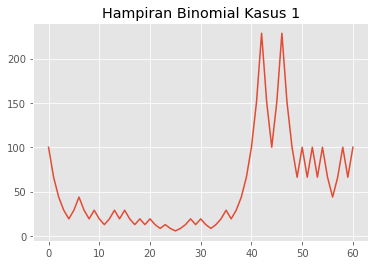

u :  1.5122403078238116
d :  0.6612705631679989
p :  0.3980510928376252


In [16]:
"Simulasi Hampiran Binomial Kasus 1"
A = 0.5*(np.exp(-mu*dt)+np.exp((mu+sigma**2)*dt))
u = A + np.sqrt(A**2 -1)
d = A - np.sqrt(A**2 -1)
p = (np.exp(mu*dt)-d)/(u-d)
time = [0]
S = [S0]

"Iterasi"
for i in range(n):
  gerak = 1*(np.random.random() < p)
  S.append(S[-1]*(gerak*u + (1-gerak)*d))
  time.append(time[-1] + dt)

"Visualisasi"
plt.plot(time,S)
plt.title("Hampiran Binomial Kasus 1")
plt.xlabel('$t$')
plt.ylabel('$S$')
plt.show()

"Nilai Taksiran Parameter"
print("u : ",u)
print("d : ",d)
print("p : ",p)

## Hampiran Binomial dengan Harga Saham saat $t=2$
Pada waktu t=2, dilihat dari bagian hampiran saat t=1, peluang naik pada 1 rentang waktu adalah $p$, dan peluang turun pada 1 rentang waktu adalah $1-p$. Akibatnya, peluang kejadian $S_2$ yang memiliki kemungkinan :

* Naik 2 kali ($u^2 S_0$)

$\;\;\;\;\;\;$Peluang : $p \times p = p^2$
* Turun 2 kali ($d^2 S_0$)

$\;\;\;\;\;\;$Peluang : $(1-p)\times (1-p) = (1-p)^2$
* Naik 1 kali & turun 1 kali ($udS_0$)

$\;\;\;\;\;\;$Peluang : $2\times(1-p)\times p=2p(1-p)$



Akibatnya, dengan pendekatan binomial, ekspektasi untuk $t=2$ adalah
\begin{align*}
  E[S_2] &= p^2 u^2S_0+2p(1-p)udS_0+(1-p)^2 d^2S_0 \\
   &=   S_0[p^2 u^2+2p(1-p)ud+(1-p)^2 d^2]
\end{align*}
dan diperoleh juga momen kedua untuk $S_2$ dengan pendekatan binomial sebagai berikut 
\begin{align*} 
  E[(S_2)^2] &= p^2(u^2S_0)^2+2p(1-p)(udS_0)^2+(1-p)^2(d^2S_0)^2 \\
   &= S_0^2[p^2u^4+2p(1-p)(ud)^2+(1-p)^2d^4]
\end{align*}
Diketahui juga pada bagian sebelumnya bahwa 
\begin{align*}
E[S_2] &=S_0e^{2\mu \Delta t} \\
Var(S_2) &= S_0^2(e^{2\sigma^2 \Delta t}-1)e^{4\mu \Delta t} \\
\end{align*}
Sehingga variansi dapat ditulis juga dalam bentuk : 
\begin{align*} 
  Var(S_2) = E[(S_2)^2]-(E[S_2])^2 &= S_0^2[p^2u^4+2p(1-p)(ud)^2+(1-p)^2d^4]- (S_0e^{2\mu \Delta t})^2 \\
   &= S_0^2[p^2u^4+2p(1-p)(ud)^2+(1-p)^2d^4 - e^{4\mu \Delta t}]
\end{align*}
Sehingga dengan menyamakan kedua ekspektasi, diperoleh persamaan :
\begin{align*}
S_0[p^2 u^2+2p(1-p)ud+(1-p)^2 d^2] &=S_0e^{2\mu \Delta t} \\
p^2 u^2+2p(1-p)ud+(1-p)^2 d^2 &=e^{2\mu \Delta t}
\end{align*}

dan dengan menyamakan kedua variansi, diperoleh persamaan :
\begin{align*}
S_0^2[p^2u^4+2p(1-p)(ud)^2+(1-p)^2d^4 - e^{4\mu \Delta t}] &= S_0^2(e^{2\sigma^2 \Delta t}-1)e^{4\mu \Delta t} \\
p^2u^4+2p(1-p)(ud)^2+(1-p)^2d^4 - e^{4\mu \Delta t} &= (e^{2\sigma^2 \Delta t}-1)e^{4\mu \Delta t} \\
p^2u^4+2p(1-p)(ud)^2+(1-p)^2d^4 &= e^{(4\mu + 2\sigma^2) \Delta t}
\end{align*}

Perhatikan bahwa dari hampiran binomial pada waktu $t=1$, diperoleh persamaan :
$$pu + (1-p)d = e^{\mu \Delta t}$$
dan
$$pu^2 + (1-p)d^2 = e^{(2\mu + \sigma^2) \Delta t}$$
dengan solusi yang telah diuraikan per kasus pada bagian sebelumnya.

Lebih lanjut, perhatikan uraian berikut :
\begin{align*}
e^{2\mu \Delta t} &= (e^{\mu \Delta t})^2\\
&= (pu + (1-p)d)^2\\
&= p^2 u^2+2p(1-p)ud+(1-p)^2 d^2
\end{align*}
dan
\begin{align*}
e^{(4\mu + 2\sigma^2) \Delta t} &= (e^{(2\mu + \sigma^2) \Delta t})^2\\
&= (pu^2 + (1-p)d^2)^2\\
&= p^2u^4+2p(1-p)(ud)^2+(1-p)^2d^4
\end{align*}

Kedua persamaan dari waktu $t=2$ ekuivalen dengan waktu $t=1$, akibatnya solusi dari persamaan tersebut (untuk tiap kasus) akan sama dengan uraian pada bagian waktu $t=1$.

Sehingga dapat disimpulkan bahwa untuk tiap waktu, peluang naik dan turun bernilai sama, dengan masing-masing kemungkinan dapat diperoleh dari aturan perkalian.

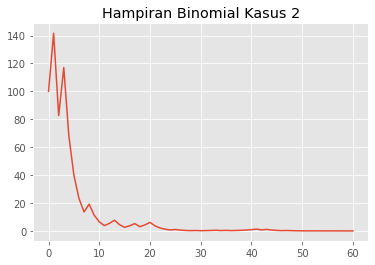

u :  1.4165463611554063
d :  0.5834536388445936
p :  0.5


In [17]:
"Simulasi Hampiran Binomial Kasus 2"
p = 0.5
u = np.exp(mu*dt)*(1+np.sqrt(np.exp((sigma**2)*dt)-1))
d = np.exp(mu*dt)*(1-np.sqrt(np.exp((sigma**2)*dt)-1))
time = [0]
S = [S0]

"Iterasi"
for i in range(n):
  gerak = 1*(np.random.random() < p)
  S.append(S[-1]*(gerak*u + (1-gerak)*d))
  time.append(time[-1] + dt)

"Visualisasi"
plt.plot(time,S)
plt.title("Hampiran Binomial Kasus 2")
plt.xlabel('$t$')
plt.ylabel('$S$')
plt.show()

"Nilai Taksiran Parameter"
print("u : ",u)
print("d : ",d)
print("p : ",p)

# **Pengantar Kalkulus Stokastik**

## Penurunan Fungsi Secara Stokastik

Misal $X_t$ merupakan suatu peubah acak.

$$\Delta X_t = X_{t+\Delta t} - X_t$$
untuk suatu selang waktu yang sangat kecil $(\Delta t \to 0)$, maka
$$dX_t = X_{t+dt} - X_t \Rightarrow X_{t+dt} = X_t + dX_t$$

Beberapa sifat yang dipenuhi oleh peubah acak tersebut adalah :

* $$d(cX_t) = c\;dX_t , \,c\in \mathbb{R}$$
  
* $$d(X_t \pm Y_t) = dX_t \pm dY_t$$    

* $$d(X_t Y_t) =  X_t dY_t + Y_t dX_t +dX_t dY_t$$ 

* $$d\left(\frac{X_t}{Y_t} \right) = \frac{Y_t dX_t -X_t dY_t -dX_t dY_t}{Y_t^2} + \frac{X_t}{Y_t^3} (dY_t)^2$$

Lalu, dengan menghubungkan sifat-sifat tersebut dengan suatu Proses Wiener $W_t$, maka

\begin{align*}
d(W_t^2) = d(W_t W_t) = W_t dW_t + dW_t W_t + dW_t dW_t = 2 W_t dW_t + dt 
\end{align*}

\begin{align*}
d(W_t^3) = d(W_t W_t^2) &= W_t dW_t^2 + dW_t W_t^2 + dW_t dW_t^2 = 2 W_t dW_t + dt\\ 
&= W_t ( 2 W_t dW_t + dt) + dW_t W_t^2 + dW_t ( 2 W_t dW_t + dt)\\
&= 2W_t^2dW_t+W_tdt+ W_t^2 dW_t  + 2W_t(dW_t)^2 + dW_tdt\\
&= 3W_t^2dW_t+ W_tdt + 2W_tdt + 0\\
&= 3W_t^2dW_t + 3W_tdt
\end{align*}
  
  
Contoh :   
Misalkan  
\begin{align*}
Z_t = \int_0^tW_u\,du 
\end{align*}
 
Dapat diperoleh :  
\begin{align*}
dZ_t = Z_{t+\Delta t} - Z_t &= \int_0^{t+\Delta t}W_u\,du -\int_0^{t}W_u\,du\\
&= \int_t^{t+\Delta t}W_u\,du = W_t dt
\end{align*}

Hal ini dapat diperoleh dari :  
\begin{align*}
\int_a^{a+\Delta x} f(u) \, du &\approx f(a) \Delta x\\
&\approx F(a+\Delta x) - F(a) \quad \text{TDK 1}\\
&\approx F'(a) \Delta x = f(a)
\end{align*}



### Ito Lemma

**Ito Formula**

Misal $X_t$ merupakan proses stokastik, dengan

$$dX_t = \mu_t dt +\sigma_t dW_t$$
dan
$$F_t = f(X_t)$$
$$dF_t = f'(X_t)dX_t + \frac{1}{2}f''(X_t)(dX_t)^2$$
Maka berlaku,
$$dF_t = [\mu_t f'(X_t) +\frac{\sigma_t^2}{2}f''(X_t)]dt + \sigma_t f'(X_t) dW_t$$

Perhatikan bahwa :  
\begin{align*}
(dX_t)^2 &= (\mu_tdt+\sigma_tdW_t)^2\\
&= (\mu_t^2 dt^2 + 2\mu_t\sigma_tdtdW_t + \sigma_t^2 (dW_t)^2)\\
&= \sigma_t^2 dt
\end{align*}



## Bukti - Bukti Beberapa Penurunan Fungsi Secara Stokastik

### Constant Multiple Rule
$$d(cX_t) = c\;dX_t , \,c\in \mathbb{R}$$

**Bukti**
$$d(cX_t) = cX_{t+\Delta t}-cX_{t} = c(X_{t+\Delta t}-X_{t}) = cd(X_t) , \,c\in \mathbb{R}$$  

### Sum and Difference Rule  
$$d(X_t \pm Y_t) = dX_t \pm dY_t$$    

**Bukti**  
\begin{align*}
d(X_t \pm Y_t) = (X_{t+\Delta t} \pm Y_{t+\Delta t})-(X_t \pm Y_t) &= (X_{t+\Delta t} - X_t) \pm ( Y_{t+\Delta t} - Y_t)\\
&= dX_t \pm dY_t
\end{align*}    

### Product Rule 
$$d(X_t Y_t) =  X_t dY_t + Y_t dX_t +dX_t dY_t$$  

**Bukti**  
\begin{align*}
d(X_t Y_t) &= X_{t+\Delta t} Y_{t+\Delta t} - X_t Y_t \quad \text{(Dilengkapi Kuadrat)}\\
&= X_t(Y_{t+\Delta t} - Y_t) + Y_t(X_{t+\Delta t}-X_t) + (X_{t+\Delta t}-X_t)(Y_{t+\Delta t}-Y_t) 
\end{align*}   

### Quotient Rule
$$d\left(\frac{X_t}{Y_t} \right) = \frac{Y_t dX_t -X_t dY_t -dX_t dY_t}{Y_t^2} + \frac{X_t}{Y_t^3} (dY_t)^2$$

**Bukti**
\begin{align*}
d\left(\frac{X_t}{Y_t} \right) = d\left( X_t\frac{1}{Y_t}\right) &=\frac{1}{Y_t}d(X_t)+  X_t d\left(\frac{1}{Y_t}\right) +dX_t d\left(\frac{1}{Y_t}\right)\\
&= \frac{1}{Y_t}dX_t+  X_t \left(-\frac{1}{Y_t^2}dY_t+2\frac{1}{2}\frac{dY_t^2}{Y_t^3} \right) +dX_t \left(-\frac{1}{Y_t^2}dY_t+2\frac{1}{2}\frac{dY_t^2}{Y_t^3} \right)\\ 
&= \frac{dX_t}{Y_t} -\frac{X_tdY_t}{Y_t^2}+\frac{X_tdY_t^2}{Y_t^3} -\frac{dX_tdY_t}{Y_t^2}+\frac{dX_tdY_t^2}{Y_t^3}\\ 
&= \frac{Y_t dX_t -X_t dY_t -dX_t dY_t}{Y_t^2} + \frac{X_t}{Y_t^3} (dY_t)^2 + 0\\
&= \frac{Y_t dX_t -X_t dY_t -dX_t dY_t}{Y_t^2} + \frac{X_t}{Y_t^3} (dY_t)^2
\end{align*}   
